Now is the time to put all we have discussed above into action. Here, we shall use a real-world dataset to implement an Agglomerative clustering model and finally visualize how the model could discover various clusters from the data.

Now we look into examples using Python to demonstrate the Hierarchical Clustering Model. We have 200 mall customers’ data in our dataset. Each customer’s customerID, genre, age, annual income, and spending score are all included in the data frame. The amount computed for each of their clients’ spending scores is based on several criteria, such as their income, the number of times per week they visit the mall, and the money they spent for a year. This score ranges from 1 to 100. Because we don’t know the answers, a business problem becomes a clustering problem.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Mall_customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
newdata  = df.iloc[:, [3, 4]].values# extract the two features from our dataset

# Determining the optimal number of clusters with dendrogram
The code below will build a dendrogram on our dataset:

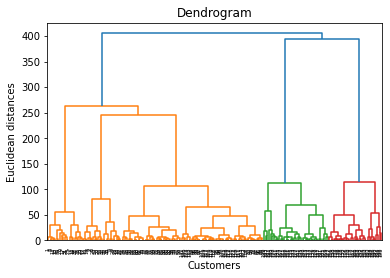

In [5]:
import scipy.cluster.hierarchy as sch # importing scipy.cluster.hierarchy for dendrogram
dendrogram = sch.dendrogram(sch.linkage(newdata, method = 'ward'))# finding the optimal number of clusters using dendrogram
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Hierarchical Clustering model training on the data

In [6]:
from sklearn.cluster import AgglomerativeClustering
'''
we need to create an AgglomerativeClustering object, and in it, we pass the following parameters;
n_cluster = 5, the number of clusters our model should return
affinity = euclidean, specify metric to be used to calculate distances 
linkage  = ward to regulate how distance calcualtion will be carried out between different clusters.
'''
Agg_hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = Agg_hc.fit_predict(newdata)#model fitting on the dataset
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

# Clusters viaualization

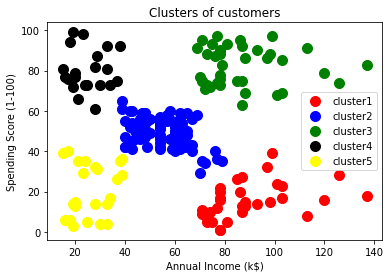

In [7]:
plt.scatter(newdata[y_hc == 0, 0], newdata[y_hc == 0, 1], s = 100, c = 'red', label = 'cluster1') #plotting cluster1
plt.scatter(newdata[y_hc == 1, 0], newdata[y_hc == 1, 1], s = 100, c = 'blue', label = 'cluster2') #plotting cluster2
plt.scatter(newdata[y_hc == 2, 0], newdata[y_hc == 2, 1], s = 100, c = 'green', label = 'cluster3') #plotting cluster3
plt.scatter(newdata[y_hc == 3, 0], newdata[y_hc == 3, 1], s = 100, c = 'black', label = 'cluster4') #plotting cluster4
plt.scatter(newdata[y_hc == 4, 0], newdata[y_hc == 4, 1], s = 100, c = 'yellow', label = 'cluster5') #plotting cluster5
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()